In [14]:
import numpy as np
from scipy import linalg as la
import sympy
import matplotlib.pyplot as plt

x_1 0.7395361335152383



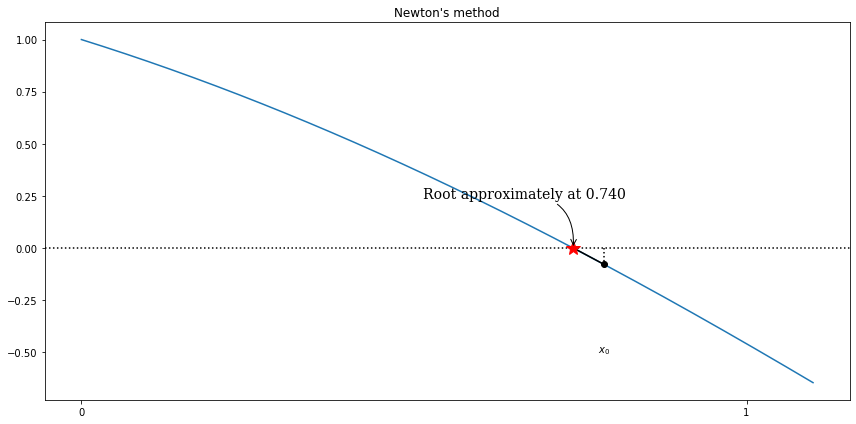

In [15]:
# define a function, desired tolerance and starting point xk
tol = 0.001 
xk = np.pi/4

s_x = sympy.symbols("x")
s_f = sympy.cos(s_x) - s_x

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(0, 1.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# repeat Newton's method until convergence to the desired tolerance has been reached
n = 0
while abs(f(xk)) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

    print('x_%d'%n, xk)

print()
ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newton's method")
ax.set_xticks([0, 1])
fig.tight_layout()
fig.savefig('ch5-nonlinear-newton.pdf')